In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


datasets  model.json  Untitled0.ipynb  weights.h5


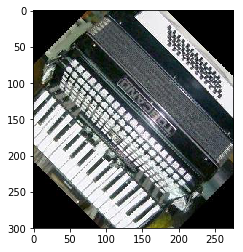

In [2]:
!ls "/content/drive/My Drive/FSI"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/FSI/datasets/101_ObjectCategories/101_ObjectCategories_trainning/accordion/image_0022.jpg', 'r')
imshow(np.asarray(pil_im))

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/FSI/datasets/101_ObjectCategories/101_ObjectCategories_trainning'
validation_data_dir = '/content/drive/My Drive/FSI/datasets/101_ObjectCategories/101_ObjectCategories_test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

while True:
  epochs = 20

  model.fit_generator(
          train_generator,
         steps_per_epoch=200,
         epochs=epochs, 
         validation_data=validation_generator,
         validation_steps=500,
  )
  
  #Safe Spot
  from keras.models import model_from_json
  model_json = model.to_json()
  with open("/content/drive/My Drive/FSI/model.json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights("/content/drive/My Drive/FSI/weights.h5")
  print("Saved model to disk")

Found 5981 images belonging to 100 classes.
Found 2261 images belonging to 100 classes.
Epoch 1/20
200/200 [==============================] - 94s 471ms/step - loss: 4.3423 - acc: 0.1173 - val_loss: 4.4401 - val_acc: 0.0651
Epoch 2/20
200/200 [==============================] - 93s 466ms/step - loss: 3.9365 - acc: 0.1945 - val_loss: 4.3705 - val_acc: 0.1055
Epoch 3/20
200/200 [==============================] - 93s 463ms/step - loss: 3.4918 - acc: 0.2825 - val_loss: 4.1013 - val_acc: 0.1487
Epoch 4/20
200/200 [==============================] - 93s 466ms/step - loss: 3.1289 - acc: 0.3470 - val_loss: 3.5714 - val_acc: 0.2448
Epoch 5/20
200/200 [==============================] - 93s 463ms/step - loss: 2.9366 - acc: 0.3728 - val_loss: 3.2861 - val_acc: 0.2954
Epoch 6/20
200/200 [==============================] - 92s 458ms/step - loss: 2.6983 - acc: 0.4165 - val_loss: 3.1585 - val_acc: 0.3138
Epoch 7/20
200/200 [==============================] - 92s 460ms/step - loss: 2.4929 - acc: 0.4473 - va